# Data Exploration and Clean Up

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data file
data = pd.read_csv('KSI.csv')
df = pd.DataFrame(data)

#missing values turning into NaN
missing_values=['??','na','X','<Null>','null', ' ']
df = df.replace(missing_values,np.NaN)

#rename columns
new_names = {'ALCOHOL':   'isAlcohol',
            'SPEEDING':   'isSpeeding',
            'ROAD_CLASS': 'roadClass',
             'RDSFCOND':  'roadCondition',
            'AG_DRIV':    'isAggressive',
            'DISABILITY': 'isDisable',
            'INVAGE':     'ageInvolved',
            'INVTYPE':    'involvementType',
            'REDLIGHT':   'redlight',
            'INJURY':     'injury'
            }

df.rename(columns=new_names, inplace=True)

In [3]:
#Identify features with missing values
print(df.isna().sum()/len(df)*100)

X                   0.000000
Y                   0.000000
INDEX_              0.000000
ACCNUM              0.000000
YEAR                0.000000
DATE                0.000000
TIME                0.000000
HOUR                0.000000
STREET1             0.000000
STREET2             8.956109
OFFSET             83.712930
roadClass           2.947805
DISTRICT            0.836299
WARDNUM             1.162515
DIVISION            1.162515
LATITUDE            0.000000
LONGITUDE           0.000000
LOCCOORD            0.622776
ACCLOC             32.325030
TRAFFCTL            0.172005
VISIBILITY          0.106762
LIGHT               0.000000
roadCondition       0.136418
ACCLASS             0.000000
IMPACTYPE           0.023725
involvementType     0.071174
ageInvolved         0.000000
injury              9.561091
FATAL_NO           95.771056
INITDIR            29.027284
VEHTYPE            16.684460
MANOEUVER          42.900356
DRIVACT            49.810202
DRIVCOND           49.798339
PEDTYPE       

In [4]:
#Split Date to multiple columns for year, month, and day of the week
from datetime import date
import datetime

df['DATE']=pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['WEEKDAY'] = df['DATE'].dt.weekday
df = df.drop('DATE', axis=1)

In [5]:
# Change property damage to non-fatal in ACCLASS
df['ACCLASS'] = np.where(df['ACCLASS'] == 'Property Damage Only', 'Non-Fatal Injury', df['ACCLASS'])

In [6]:
#Create heatmap of where accidents takes place in city

import folium
from folium.plugins import HeatMap

#Copy new column to turn fatal and non fatal injury to 1 and 0
df['FATAL'] = df['ACCLASS']
df.FATAL.replace(('Fatal', 'Non-Fatal Injury'), (1, 0), inplace=True)

Fatal = df[df['FATAL'] == 1]
Fatal = Fatal[['LATITUDE', 'LONGITUDE', 'FATAL']]

lat_Toronto = df.describe().at['mean','LATITUDE']
lng_Toronto = df.describe().at['mean','LONGITUDE']

Toronto_location = [lat_Toronto, lng_Toronto]


Fatal_map = folium.Map(Toronto_location, zoom_start=11)
HeatMap(Fatal, min_opacity =0.3).add_to(Fatal_map)
Fatal_map

In [8]:
#dropping following columns due to overlapping data and insufficient data
to_drop = ['X','Y','INDEX_', 'ACCNUM', 'YEAR','TIME', 'STREET1', 'STREET2', 'WARDNUM', 'DIVISION','LATITUDE',
           'LONGITUDE','ACCLOC', 'FATAL_NO', 'INITDIR','VEHTYPE','MANOEUVER', 'DRIVACT','DRIVCOND','POLICE_DIVISION', 
           'NEIGHBOURHOOD', 'ObjectId', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'OFFSET']

df.drop(to_drop, inplace=True, axis=1)

In [9]:
#Binary Features

binarymap = {'Yes': int(True), 'No': int(False)}

df['isSpeeding'].fillna(int(False), inplace=True)
df['isSpeeding'] = df['isSpeeding'].replace(binarymap)

df['isAlcohol'].fillna(int(False), inplace=True)
df['isAlcohol'] = df['isAlcohol'].replace(binarymap)

df['redlight'].fillna(int(False), inplace=True)
df['redlight'] = df['redlight'].replace(binarymap)

df['isAggressive'].fillna(int(False), inplace=True)
df['isAggressive'] = df['isAggressive'].replace(binarymap)

df['isDisable'].fillna(int(False), inplace=True)
df['isDisable'] = df['isDisable'].replace(binarymap)

df['PEDESTRIAN'].fillna(int(False), inplace=True)
df['PEDESTRIAN'] = df['PEDESTRIAN'].replace(binarymap)

df['CYCLIST'].fillna(int(False), inplace=True)
df['CYCLIST'] = df['CYCLIST'].replace(binarymap)

df['AUTOMOBILE'].fillna(int(False), inplace=True)
df['AUTOMOBILE'] = df['AUTOMOBILE'].replace(binarymap)

df['MOTORCYCLE'].fillna(int(False), inplace=True)
df['MOTORCYCLE'] = df['MOTORCYCLE'].replace(binarymap)

df['AUTOMOBILE'].fillna(int(False), inplace=True)
df['AUTOMOBILE'] = df['AUTOMOBILE'].replace(binarymap)

df['TRUCK'].fillna(int(False), inplace=True)
df['TRUCK'] = df['TRUCK'].replace(binarymap)

df['TRSN_CITY_VEH'].fillna(int(False), inplace=True)
df['TRSN_CITY_VEH'] = df['TRSN_CITY_VEH'].replace(binarymap)

df['EMERG_VEH'].fillna(int(False), inplace=True)
df['EMERG_VEH'] = df['EMERG_VEH'].replace(binarymap)

df['PASSENGER'].fillna(int(False), inplace=True)
df['PASSENGER'] = df['PASSENGER'].replace(binarymap)

In [10]:
#Categorical Features

df['injury'].fillna('None', inplace=True)
df['injury'] = df['injury'].replace({'None': 0, 'Minimal': 1, 'Minor': 2, 'Major': 3, 'Fatal': 4})

df['roadClass'].fillna('None', inplace=True)
df['roadClass'] = df['roadClass'].replace({'None': 0,'Local': 1,'Minor Arterial': 2, 'Major Arterial': 3, 'Collector': 4, 'Expressway':5, 'Expressway Ramp':6, 'Laneway':7, 'Major Arterial Ramp':8, 'Other':9, 'Pending':10})

df['DISTRICT'].fillna('None', inplace=True)
df['DISTRICT']= df['DISTRICT'].replace({'None': 0,'Toronto and East York': 1,'Scarborough': 2,'Etobicoke York':3,'North York': 4})

df['LOCCOORD'].fillna('None', inplace=True)
df['LOCCOORD']= df['LOCCOORD'].replace({'None': 0,'Intersection': 1,'Mid-Block': 2, 'Entrance Ramp Westbound':3, 'Exit Ramp Southbound':4, 'Exit Ramp Westbound':5, 'Mid-Block (Abnormal)':6, 'Park, Private Property, Public Lane':7})

df['roadCondition'].fillna('None', inplace=True)
df['roadCondition']= df['roadCondition'].replace({'None': 0,'Dry': 1,'Wet': 2, 'Loose Snow':3, 'Other':4, 'Ice':5, 'Loose Sand or Gravel':6, 'Packed Snow':7, 'Slush':8, 'Spilled liquid':9})

df['VISIBILITY'].fillna('None', inplace=True)
df['VISIBILITY']= df['VISIBILITY'].replace({'None': 0,'Clear': 1,'Drifting Snow': 2, 'Fog, Mist, Smoke, Dust':3, 'Freezing Rain':4, 'Other':5, 'Rain':6, 'Snow':7, 'Strong Wind' :8})

df['TRAFFCTL'].fillna('None', inplace=True)
df['TRAFFCTL']= df['TRAFFCTL'].replace({'None': 0,'No Control': 1,'Pedestrian Crossover': 2, 'Police Control':3, 'School Guard':4, 'Stop Sign':5, 'Streetcar (Stop for)':6, 'Traffic Controller':7, 'Traffic Gate' :8, 'Traffic Signal':9, 'Yield Sign': 10})

df['ageInvolved']= df['ageInvolved'].replace({'unknown': 0,'0 to 4': 1,'5 to 9': 2, '10 to 14':3, '15 to 19':4, '20 to 24':5, '25 to 29':6, '30 to 34':7, '35 to 39' :8, '40 to 44':9, '45 to 49': 10, '50 to 54':11, '55 to 59':12, '60 to 64':13, '65 to 69':14, '70 to 74':15, '75 to 79':16, '80 to 84':17, '85 to 89':18, '90 to 94': 19, 'Over 95':20})

df['IMPACTYPE'].fillna('None', inplace=True)
df['IMPACTYPE']= df['IMPACTYPE'].replace({'None': 0,'Angle': 1,'Approaching': 2, 'Cyclist Collisions':3, 'Other':4, 'Pedestrian Collisions':5, 'Rear End':6, 'Sideswipe':7, 'SMV Other' :8, 'SMV Unattended Vehicle':9, 'Turning Movement': 10})

df['involvementType'].fillna('None', inplace=True)
df['involvementType']= df['involvementType'].replace({'None': 0,'Cyclist': 1,'Cyclist Passenger': 2, 'Driver':3, 'Driver - Not Hit':4, 'In-Line Skater':5, 'Moped Driver':6, 'Motorcycle Driver':7, 'Motorcycle Passenger' :8, 'Other':9, 'Other Property Owner': 10,
                                                      'Passenger':11, 'Pedestrian':12, 'Pedestrian - Not Hit':13, 'Trailer Owner':14, 'Truck Driver':15,
                                                      'Vehicle Owner':16, 'Wheelchair':17, 'Witness':18})

df['LIGHT'] = df['LIGHT'].replace({'Dark': 0,'Dark, artificial': 1,'Dawn': 2, 'Dawn, artificial':3, 'Daylight':4, 'Daylight, artificial':5, 'Dusk':6, 'Dusk, artificial':7, 'Other' :8})

df['ACCLASS'] = df['ACCLASS'].replace({'Fatal' : 0, 'Non-Fatal Injury' :1})

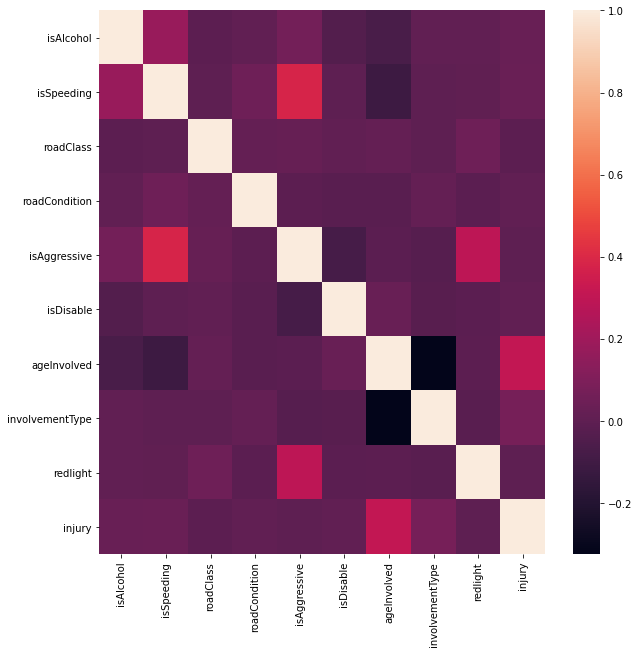

In [11]:
#create heat map for binary variables

import seaborn as sns
import matplotlib.pyplot as plt

ksi_boolean = ['isAlcohol', 'isSpeeding','roadClass','roadCondition','isAggressive','isDisable','ageInvolved','involvementType','redlight','injury']
plt.figure(figsize=(10,10))
sns.heatmap(df[ksi_boolean].corr())
plt.show()

In [12]:
#Correlation between each variable

corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,HOUR,roadClass,LOCCOORD,TRAFFCTL,LIGHT,roadCondition,ACCLASS,IMPACTYPE,involvementType,ageInvolved,injury,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,isSpeeding,isAggressive,redlight,isAlcohol,isDisable,HOOD_ID,MONTH,WEEKDAY,FATAL
HOUR,1.000000,0.015074,-0.004435,-0.006058,0.003372,-0.028710,0.034177,0.033343,-0.026011,0.044327,-0.019327,0.045341,0.042551,0.026569,0.073241,-0.048471,-0.035783,-0.005816,-0.011977,-0.086714,-0.033809,-0.064329,-0.093234,-0.009271,-0.011434,0.033214,-0.056396,-0.034177
roadClass,0.015074,1.000000,-0.133036,0.135209,0.018906,0.018042,-0.001214,0.002098,0.000137,0.020643,-0.007734,0.046172,-0.016510,-0.003672,-0.031826,0.001518,0.031061,-0.005095,-0.012406,-0.001931,0.022597,0.051708,-0.007877,0.009560,0.024319,0.011388,0.014050,0.001214
LOCCOORD,-0.004435,-0.133036,1.000000,-0.622242,-0.064875,0.020853,-0.029866,0.017292,0.012162,-0.045413,0.017725,-0.052693,-0.046831,-0.024943,0.024695,0.001735,-0.020264,-0.014551,0.016689,0.109824,-0.130971,-0.196580,0.062650,0.031787,-0.019478,0.003708,0.020294,0.029866
TRAFFCTL,-0.006058,0.135209,-0.622242,1.000000,0.040422,-0.036434,0.045312,-0.022465,-0.005811,0.054663,-0.012794,0.021731,0.005972,0.028870,-0.049014,0.033640,0.002422,0.008722,0.035046,-0.111506,0.193240,0.337144,-0.053579,-0.020322,0.003190,-0.002664,-0.006117,-0.045312
LIGHT,0.003372,0.018906,-0.064875,0.040422,1.000000,-0.119415,0.045782,-0.032674,-0.039810,0.126448,-0.018037,-0.035760,0.098908,-0.065813,0.052398,0.078276,0.044551,-0.010110,-0.085562,-0.146353,-0.005637,0.007483,-0.177944,0.057022,0.015457,-0.046119,-0.092192,-0.045782
roadCondition,-0.028710,0.018042,0.020853,-0.036434,-0.119415,1.000000,0.006121,-0.026178,0.019483,-0.015831,0.007101,0.028064,-0.074698,0.001296,-0.082454,-0.009578,0.030935,0.003464,0.002858,0.047805,-0.008414,-0.009973,0.007911,-0.015772,-0.010590,-0.092492,0.017011,-0.006121
ACCLASS,0.034177,-0.001214,-0.029866,0.045312,0.045782,0.006121,1.000000,0.018780,-0.060098,-0.052100,-0.098457,-0.098937,0.070558,0.082865,0.009798,-0.120656,-0.054809,0.017045,0.003837,-0.093799,0.029994,0.003725,-0.023917,0.003957,-0.014650,-0.002072,0.009888,-1.000000
IMPACTYPE,0.033343,0.002098,0.017292,-0.022465,-0.032674,-0.026178,0.018780,1.000000,0.029301,-0.051770,0.017906,-0.168646,-0.307587,0.038784,0.280604,-0.024290,-0.048409,-0.049301,0.105118,0.074140,0.011907,-0.214679,0.012272,0.033445,-0.016833,0.013961,0.009638,-0.018780
involvementType,-0.026011,0.000137,0.012162,-0.005811,-0.039810,0.019483,-0.060098,0.029301,1.000000,-0.324816,0.076239,0.200507,-0.228897,-0.136916,-0.040050,0.190226,0.049834,-0.001077,0.088434,-0.001579,-0.027215,-0.016045,0.010327,-0.024480,-0.001936,-0.011095,-0.006283,0.060098
ageInvolved,0.044327,0.020643,-0.045413,0.054663,0.126448,-0.015831,-0.052100,-0.051770,-0.324816,1.000000,0.307255,0.117012,-0.001830,0.019047,-0.020624,-0.025143,-0.011425,0.015547,-0.085002,-0.110336,-0.013740,-0.005066,-0.069406,0.030965,0.003925,0.015569,-0.037781,0.052100


C:\Users\William\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


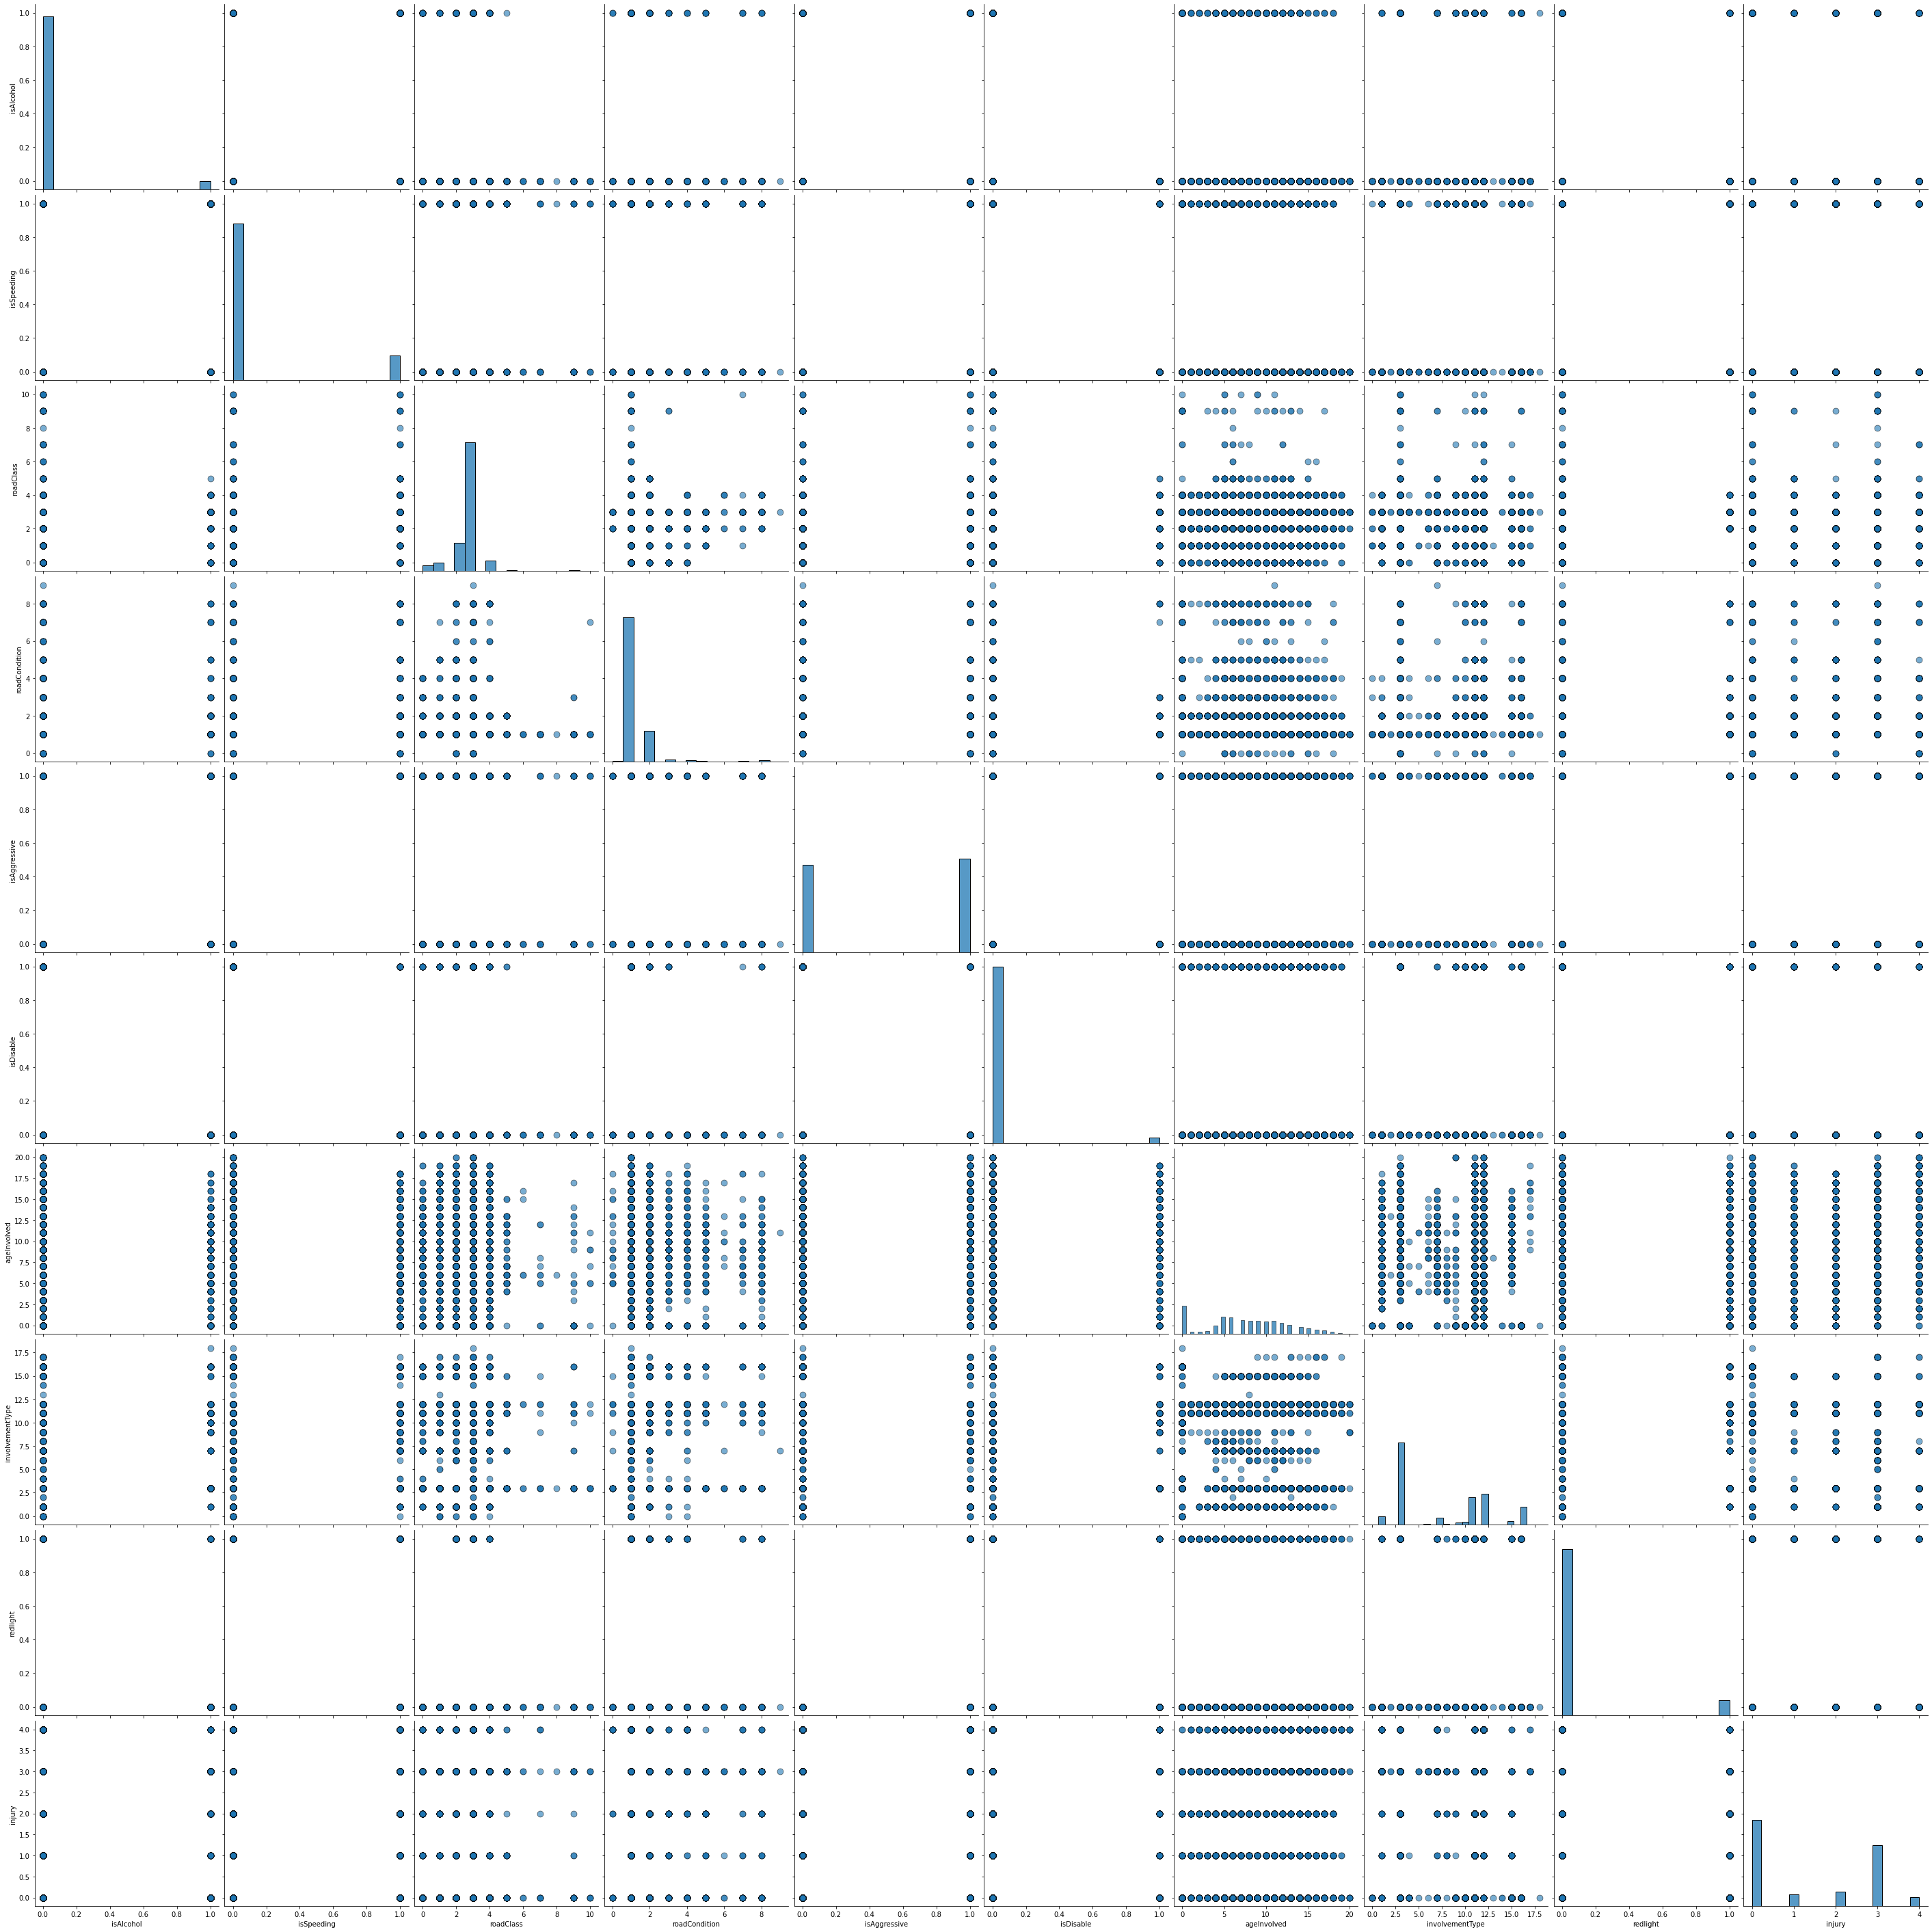

In [13]:
sns.pairplot(df, 
             vars = ['isAlcohol', 'isSpeeding','roadClass','roadCondition','isAggressive','isDisable','ageInvolved','involvementType','redlight','injury'],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Machine Learning Classificiation Model

In [14]:
# Import various multi class classification models

# Import KNearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import SVC classifier
from sklearn.svm import SVC

# Import SGDClassifier
from sklearn.linear_model import SGDClassifier

# Import Multinomial naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
# set injury type as response variable
target='injury'

# Create arrays for the features and the response variable

# set X and y
y = df[target]
X1 = df.drop(target, axis=1)
X = pd.get_dummies(X1, drop_first=True)

In [16]:
# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Test Various Models

In [17]:
#Decision tree classifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
cross_val_score(tree_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.69928826, 0.70208439, 0.70894764])

In [18]:
#AdaBoost Classifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
cross_val_score(ada_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.46136248, 0.55744789, 0.47076767])

In [19]:
# SVM Classifier

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.54905948, 0.55160142, 0.54346721])

In [20]:
# KNN Classifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.57346213, 0.57193696, 0.56990341])

In [21]:
#Logisitic Regression Multinomial

log_clf = LogisticRegression(max_iter = 5000, multi_class='multinomial')
log_clf.fit(X_train, y_train)
cross_val_score(log_clf, X_train, y_train, cv=3, scoring='accuracy')

C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

array([0.57778343, 0.59125572, 0.57295374])

In [22]:
# SGD Classifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.55363498, 0.40188104, 0.37925775])

In [23]:
# Naive Bayes

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
cross_val_score(nb_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.50381291, 0.49644128, 0.51703101])

In [24]:
# RandomForest Classifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)
cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.74148449, 0.7458058 , 0.73614642])

In [25]:
# Voting Classifier

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('AB', ada_clf), ('knn', knn_clf), ('dt', tree_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
cross_val_score(voting_clf, X_train, y_train, cv=3, scoring='accuracy')

C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

array([0.7104728 , 0.71606507, 0.70665989])

RandomForest is chosen for the highest accuracy score

In [26]:
# Check confusion matrix of RandomForest
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4895,   96,  113,  472,   37],
       [ 259,  123,   67,  258,   22],
       [ 226,   49,  218,  376,   49],
       [ 505,  146,  220, 3058,   38],
       [  51,   14,   41,   16,  453]], dtype=int64)

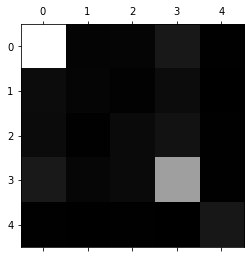

In [27]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Shows model cannot classify 1 (minimal) and 2 (minor) injury well

In [29]:
#predict results with test set

predictions = rnd_clf.predict(X_test)

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2405
           1       0.38      0.22      0.28       313
           2       0.31      0.23      0.27       393
           3       0.73      0.78      0.75      1701
           4       0.78      0.78      0.78       246

    accuracy                           0.75      5058
   macro avg       0.61      0.58      0.59      5058
weighted avg       0.73      0.75      0.74      5058



# Tune RandomForest Hyperparameter

In [40]:
# Create the parameter grid  
estimators = [175, 200, 250]
depth = [5, 10, 15, 20]
leaves = [5, 10, 15, 20]
split = [10, 20, 30]
node = [40, 60, 80, 100]
samples = [0.1, 0.2, 0.3, 0.4, 0.5]
feature = ['auto', 'sqrt', 'log2']

#hyperparameters for tuning

params = {
    'n_estimators' : estimators,
    'max_depth': depth,
    'min_samples_leaf': leaves,
    'min_samples_split': split,
    'max_leaf_nodes' : node,
    'max_samples' : samples,
    'max_features' : feature
}

In [41]:
# Create RandomizedSearch grid model

rf_rand = RandomizedSearchCV(estimator = rnd_clf,
                    param_distributions=params, n_iter = 300,
                    cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
rf_rand.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [40, 60, 80, 100],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4,
                                                        0.5],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [175, 200, 250]},
                   scoring='accuracy', verbose=1)

In [42]:
#Find the best parameters

rf_rand.best_params_

{'n_estimators': 200,
 'min_samples_split': 30,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_leaf_nodes': 60,
 'max_features': 'sqrt',
 'max_depth': 15}

In [43]:
rf_rand.best_estimator_

RandomForestClassifier(max_depth=15, max_features='sqrt', max_leaf_nodes=60,
                       max_samples=0.5, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=200, random_state=42)

In [44]:
# Check accuracy score from cross validation

cross_val_score(rf_rand.best_estimator_, X_train, y_train, cv=3, scoring='accuracy')

array([0.76182003, 0.76563294, 0.75699034])

In [45]:
# check confusion matrix with trainng set

y_train_pred = cross_val_predict(rf_rand.best_estimator_, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5059,    0,    2,  523,   29],
       [ 367,    0,    0,  345,   17],
       [ 353,    0,    9,  507,   49],
       [ 484,    0,    3, 3444,   36],
       [  94,    0,    6,    0,  475]], dtype=int64)

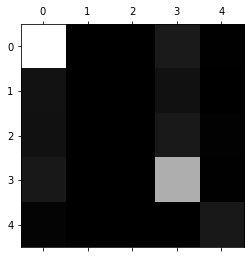

In [46]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
# fit tuned model to check results with test set

tuned_model = rf_rand.best_estimator_
tuned_predictions = tuned_model.predict(X_test)
print(classification_report(y_test, tuned_predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2405
           1       0.00      0.00      0.00       313
           2       0.00      0.00      0.00       393
           3       0.70      0.88      0.78      1701
           4       0.78      0.85      0.81       246

    accuracy                           0.76      5058
   macro avg       0.46      0.52      0.49      5058
weighted avg       0.66      0.76      0.70      5058



C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Further refine parameter grid based on the results of initial random search 

estimators = [200]
depth = [13, 15, 17]
leaves = [4, 5, 6]
split = [29, 30, 31]
node = [50, 60, 70]
samples = [ 0.5, 0.6 , 0.7]
feature = ['auto', 'sqrt']


params = {
    'n_estimators' : estimators,
    'max_depth': depth,
    'min_samples_leaf': leaves,
    'min_samples_split': split,
    'max_leaf_nodes' : node,
    'max_samples' : samples,
    'max_features' : feature
}

In [50]:
# Create grid model

rf_rand = RandomizedSearchCV(estimator = rnd_clf,
                    param_distributions=params, n_iter = 600,
                    cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
rf_rand.fit(X_train, y_train)

C:\Users\William\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 486 is smaller than n_iter=600. Running 486 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=600, n_jobs=-1,
                   param_distributions={'max_depth': [13, 15, 17],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [50, 60, 70],
                                        'max_samples': [0.5, 0.6, 0.7],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [29, 30, 31],
                                        'n_estimators': [200]},
                   scoring='accuracy', verbose=1)

In [51]:
#Find the best parameters
rf_rand.best_params_

{'n_estimators': 200,
 'min_samples_split': 31,
 'min_samples_leaf': 5,
 'max_samples': 0.7,
 'max_leaf_nodes': 70,
 'max_features': 'auto',
 'max_depth': 17}

In [52]:
rf_rand.best_estimator_

RandomForestClassifier(max_depth=17, max_leaf_nodes=70, max_samples=0.7,
                       min_samples_leaf=5, min_samples_split=31,
                       n_estimators=200, random_state=42)

In [53]:
cross_val_score(rf_rand.best_estimator_, X_train, y_train, cv=3, scoring='accuracy')

array([0.76004067, 0.76639553, 0.76385358])

In [54]:
y_train_pred = cross_val_predict(rf_rand.best_estimator_, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5056,    0,    3,  522,   32],
       [ 354,    0,    0,  352,   23],
       [ 338,    0,   17,  504,   59],
       [ 472,    0,    4, 3451,   40],
       [  82,    0,    7,    0,  486]], dtype=int64)

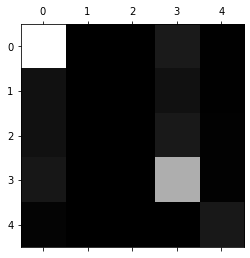

In [55]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [56]:
tuned_model = rf_rand.best_estimator_
tuned_predictions = tuned_model.predict(X_test)
print(classification_report(y_test, tuned_predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2405
           1       0.00      0.00      0.00       313
           2       0.50      0.02      0.03       393
           3       0.70      0.89      0.79      1701
           4       0.76      0.85      0.80       246

    accuracy                           0.76      5058
   macro avg       0.55      0.53      0.49      5058
weighted avg       0.70      0.76      0.71      5058



C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\William\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Merge Minor and Minimal Injury to determine if model accuracy improves

In [57]:
#Merge all Minor injury (2) to Minimal injury (1)

df.loc[df.injury == 2, 'injury'] = 1

In [58]:
target='injury'
# Create arrays for the features and the response variable

# set X and y
y = df[target]
X1 = df.drop(target, axis=1)
X = pd.get_dummies(X1, drop_first=True)

In [59]:
# Split the data set into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Fit train set into model to check if accuracy improves

In [60]:
#Define random forest classifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# check cross validation score

cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.75139807, 0.74809354, 0.74911032])

In [62]:
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4881,  252,  442,   38],
       [ 470,  548,  561,   68],
       [ 496,  448, 2988,   35],
       [  49,   61,   24,  441]], dtype=int64)

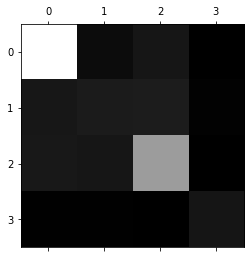

In [63]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [64]:
# apply model to test set to evaluate accuracy and f1 score

predictions = rnd_clf.predict(X_test)

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2405
           1       0.42      0.37      0.39       706
           3       0.73      0.76      0.74      1701
           4       0.78      0.72      0.75       246

    accuracy                           0.75      5058
   macro avg       0.69      0.68      0.68      5058
weighted avg       0.75      0.75      0.75      5058



Tune Hyperparameters

In [66]:
# Create the parameter grid based on the results of previous random search 
estimators = [175, 200, 225, 250]
depth = [15, 20, 25]
leaves = [2, 4, 6, 8]
split = [25, 30, 35, 40]
node = [50, 75, 100, 125]
samples = [0.4, 0.5, 0.6, 0.7]
feature = ['auto', 'sqrt']



params = {
    'n_estimators' : estimators,
    'max_depth': depth,
    'min_samples_leaf': leaves,
    'min_samples_split': split,
    'max_leaf_nodes' : node,
    'max_samples' : samples,
    'max_features' : feature
}

In [67]:
# Create randomizedsearch grid model

rf_rand = RandomizedSearchCV(estimator = rnd_clf,
                    param_distributions=params, n_iter = 400,
                    cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
rf_rand.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'max_depth': [15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [50, 75, 100, 125],
                                        'max_samples': [0.4, 0.5, 0.6, 0.7],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [25, 30, 35, 40],
                                        'n_estimators': [175, 200, 225, 250]},
                   scoring='accuracy', verbose=1)

In [68]:
#Find the best parameters

rf_rand.best_params_

{'n_estimators': 175,
 'min_samples_split': 25,
 'min_samples_leaf': 2,
 'max_samples': 0.7,
 'max_leaf_nodes': 100,
 'max_features': 'sqrt',
 'max_depth': 20}

In [69]:
rf_rand.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', max_leaf_nodes=100,
                       max_samples=0.7, min_samples_leaf=2,
                       min_samples_split=25, n_estimators=175)

In [70]:
# Check cross validation score
cross_val_score(rf_rand.best_estimator_, X_train, y_train, cv=3, scoring='accuracy')

array([0.77732588, 0.77910524, 0.76131164])

In [71]:
# check confusion matrix

y_train_pred = cross_val_predict(rf_rand.best_estimator_, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4933,  194,  458,   28],
       [ 540,  481,  570,   56],
       [ 386,  308, 3242,   31],
       [  61,   40,    0,  474]], dtype=int64)

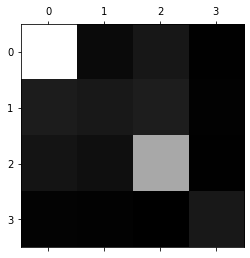

In [72]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [73]:
tuned_model = rf_rand.best_estimator_
tuned_predictions = tuned_model.predict(X_test)
print(classification_report(y_test, tuned_predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2405
           1       0.44      0.30      0.36       706
           3       0.76      0.84      0.79      1701
           4       0.83      0.77      0.80       246

    accuracy                           0.77      5058
   macro avg       0.72      0.69      0.70      5058
weighted avg       0.76      0.77      0.76      5058



In [74]:
#Further narrow down hyperparameter range for model with random grid search
# Create the parameter grid based on the results of random search 
estimators = [150, 160, 170, 180]
depth = [18, 20, 22]
leaves = [2, 3, 4]
split = [20, 25, 30]
node = [90, 100, 115]
samples = [0.6, 0.7, 0.8]
feature = ['auto', 'sqrt']



params = {
    'n_estimators' : estimators,
    'max_depth': depth,
    'min_samples_leaf': leaves,
    'min_samples_split': split,
    'max_leaf_nodes' : node,
    'max_samples' : samples,
    'max_features' : feature
}

In [75]:
# Create grid model
rf_rand = RandomizedSearchCV(estimator = rnd_clf,
                    param_distributions=params, n_iter = 400,
                    cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
rf_rand.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'max_depth': [18, 20, 22],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [90, 100, 115],
                                        'max_samples': [0.6, 0.7, 0.8],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [20, 25, 30],
                                        'n_estimators': [150, 160, 170, 180]},
                   scoring='accuracy', verbose=1)

In [76]:
rf_rand.best_params_

{'n_estimators': 170,
 'min_samples_split': 25,
 'min_samples_leaf': 3,
 'max_samples': 0.8,
 'max_leaf_nodes': 115,
 'max_features': 'sqrt',
 'max_depth': 20}

In [77]:
rf_rand.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', max_leaf_nodes=115,
                       max_samples=0.8, min_samples_leaf=3,
                       min_samples_split=25, n_estimators=170)

In [78]:
cross_val_score(rf_rand.best_estimator_, X_train, y_train, cv=3, scoring='accuracy')

array([0.78164718, 0.78012201, 0.76207422])

In [79]:
y_train_pred = cross_val_predict(rf_rand.best_estimator_, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4945,  204,  438,   26],
       [ 528,  501,  554,   64],
       [ 385,  330, 3217,   35],
       [  61,   37,    0,  477]], dtype=int64)

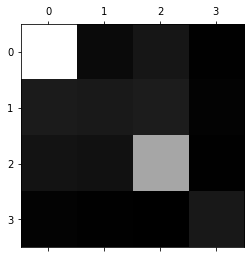

In [80]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [81]:
tuned_model = rf_rand.best_estimator_
tuned_predictions = tuned_model.predict(X_test)
print(classification_report(y_test, tuned_predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2405
           1       0.45      0.31      0.37       706
           3       0.76      0.83      0.80      1701
           4       0.83      0.78      0.80       246

    accuracy                           0.78      5058
   macro avg       0.72      0.70      0.71      5058
weighted avg       0.76      0.78      0.77      5058

